In [1]:
import matplotlib.pyplot as plt             # to visualize
from tabulate import tabulate               # to print the table
import matplotlib as mat                    # to visualize 
import seaborn as sns                       # to visualize
import pandas as pd                         # for data reading
import numpy as np  

In [2]:
df=pd.read_csv('data brazil housung eda hackathon 1.csv')

In [3]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [4]:
df.tail()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020
10691,São Paulo,80,2,1,0,0,acept,not furnished,0,1400,165,22,1587


In [5]:
df.shape

(10692, 13)

In [10]:
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  int64 
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


In [11]:
df.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [12]:

def seprate_data_types(df):
    categorical = []
    continuous = []
    for column in df.columns:                
        if df[column].nunique() < 43:       
                                                
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = seprate_data_types(df)         


from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "Continuous": continuous}, headers = ["categorical", "continuous"]))

categorical     continuous
--------------  -------------------
city            area
rooms           hoa (R$)
bathroom        rent amount (R$)
parking spaces  property tax (R$)
floor           fire insurance (R$)
animal          total (R$)
furniture


In [13]:
def info_of_cat(col): 
    print(f"Unique values in {col} are: {df[col].unique()}")
    print(f"Mode of {col} is {df[col].mode()[0]}")  
    print(f"Number of missing values in {col} is {df[col].isnull().sum()}") 
    if df[col].isnull().sum() > 0:  
        print(f"\nThere are null values in the {col} column")
    

## analysis of categorical


In [37]:
categorical

['city', 'rooms', 'bathroom', 'parking spaces', 'floor', 'animal', 'furniture']

## city

In [15]:
info_of_cat('city')

Unique values in city are: ['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte']
Mode of city is São Paulo
Number of missing values in city is 0


In [16]:
# it is nominal data type

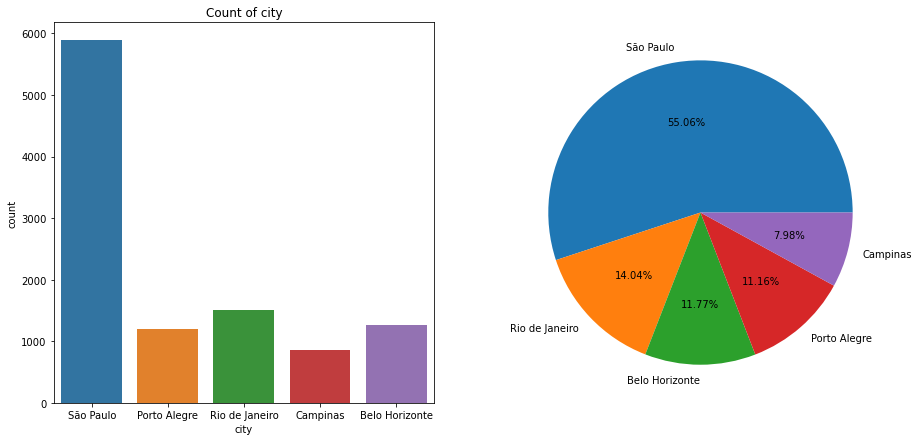

In [17]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of city")               
percentage = df["city"].value_counts()         
labels = list(df["city"].value_counts().index) 

sns.countplot(x = df["city"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")   

plt.show()

In [ ]:
# apart from sao paulo and rio, max houses are present in belo horizonte

## rooms

In [18]:
info_of_cat('rooms')

Unique values in rooms are: [ 2  4  1  3  7  5  8  6 10 13  9]
Mode of rooms is 3
Number of missing values in rooms is 0


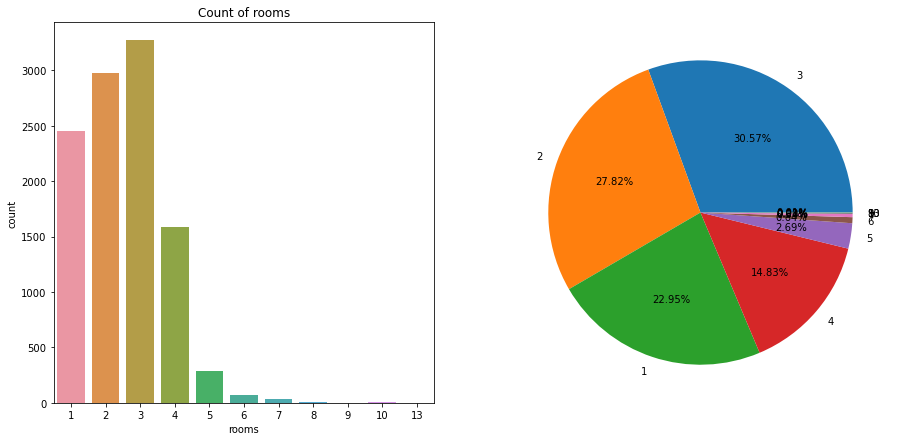

In [26]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of rooms")                  # Set the title of the graph
percentage = df["rooms"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["rooms"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = df["rooms"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

In [ ]:
# max no of houses have 3 rooms

## bathroom

In [20]:
info_of_cat('bathroom')

Unique values in bathroom are: [ 1  4  3  2  6  5  7  9  8 10]
Mode of bathroom is 1
Number of missing values in bathroom is 0


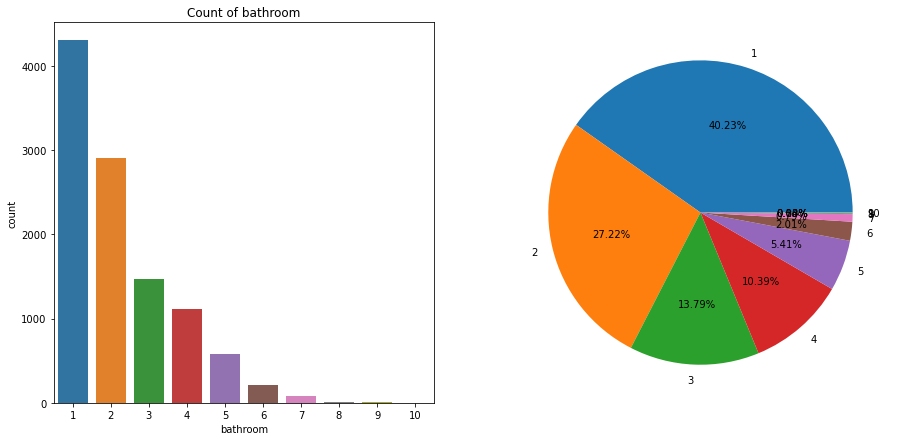

In [25]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of bathroom")                  # Set the title of the graph
percentage = df["bathroom"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["bathroom"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = df["bathroom"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

## parking spaces

In [22]:
info_of_cat('parking spaces')

Unique values in parking spaces are: [ 1  0  7  4  2  6  3  8  5 10 12]
Mode of parking spaces is 1
Number of missing values in parking spaces is 0


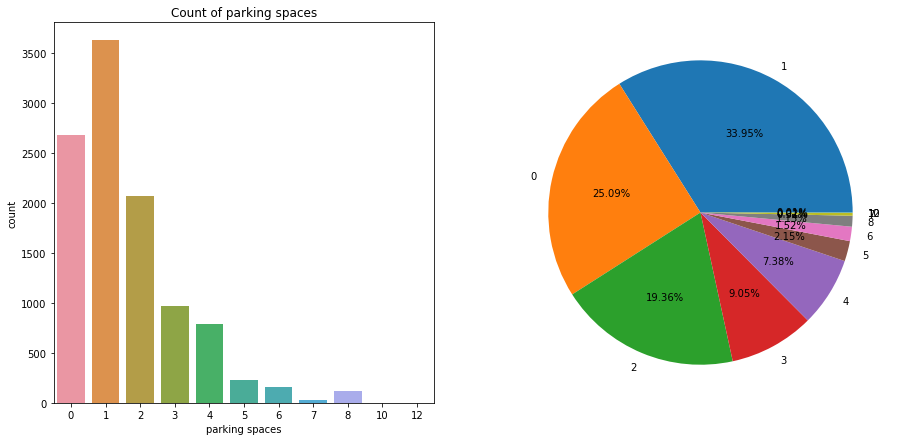

In [24]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of parking spaces")                  # Set the title of the graph
percentage = df["parking spaces"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["parking spaces"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = df["parking spaces"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

## floor

In [27]:
info_of_cat('floor')

Unique values in floor are: [  7  20   6   2   1   0   4   3  10  11  24   9   8  17  18   5  13  15
  16  14  26  12  21  19  22  27  23  35  25  46  28  29 301  51  32]
Mode of floor is 0
Number of missing values in floor is 0


In [ ]:
# as 301 floors is not possible, we should delete it

In [90]:
df1=df.drop(df[df['floor']==301].index,axis=0)
df1

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [94]:
df1.floor.unique()

array([ 7, 20,  6,  2,  1,  0,  4,  3, 10, 11, 24,  9,  8, 17, 18,  5, 13,
       15, 16, 14, 26, 12, 21, 19, 22, 27, 23, 35, 25, 46, 28, 29, 51, 32],
      dtype=int64)

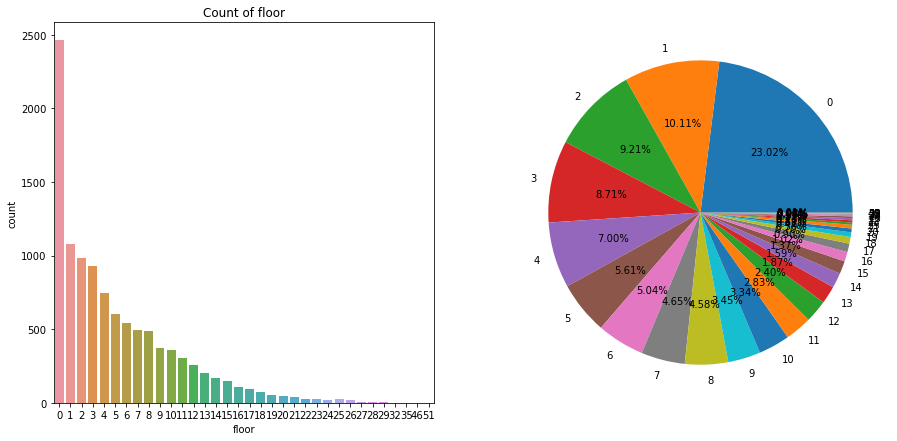

In [95]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of floor")                  
percentage = df1["floor"].value_counts()        
labels = list(df1["floor"].value_counts().index) 

sns.countplot(x = df1["floor"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")   

plt.show()

## animal

In [29]:
info_of_cat('animal')

Unique values in animal are: ['acept' 'not acept']
Mode of animal is acept
Number of missing values in animal is 0


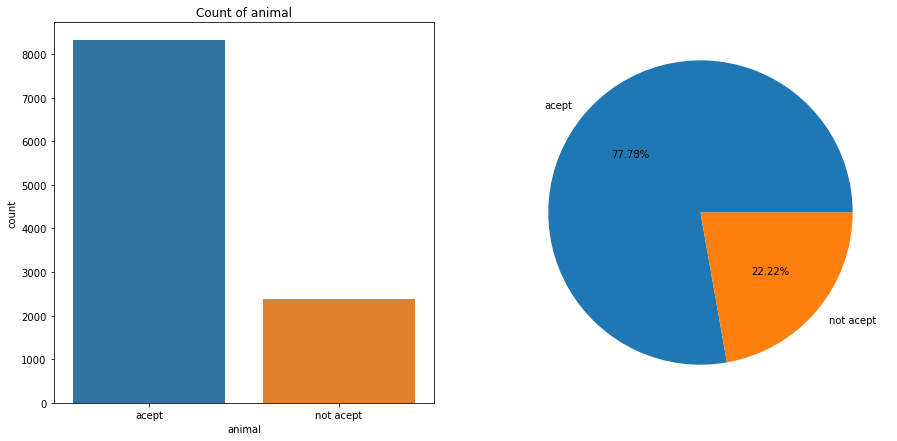

In [96]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of animal")                  # Set the title of the graph
percentage = df1["animal"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df1["animal"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = df1["animal"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

## furniture

In [31]:
info_of_cat('furniture')

Unique values in furniture are: ['furnished' 'not furnished']
Mode of furniture is not furnished
Number of missing values in furniture is 0


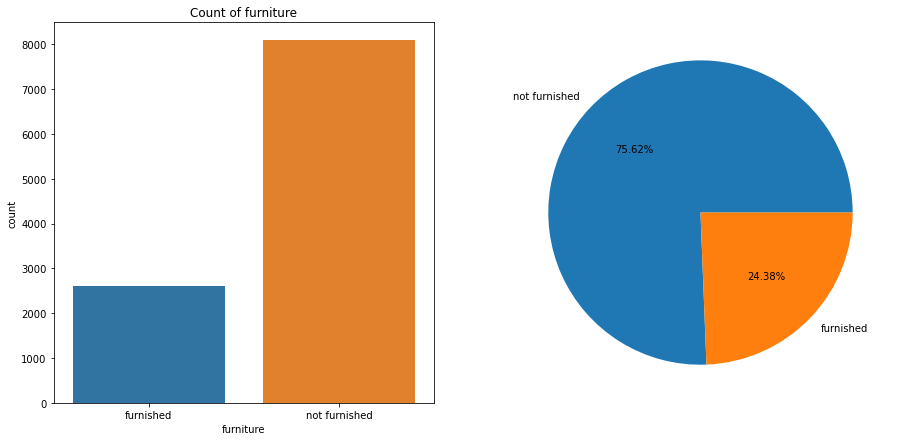

In [97]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of furniture")                  # Set the title of the graph
percentage = df1["furniture"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df1["furniture"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = df1["furniture"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

## analysis of continuous data

In [98]:
def info_of_numerical(col):
    print(f"The mean of the {col} is {df1[col].mean()}")
    print(f"The median of the {col} is {df1[col].median()}")
    print(f"The mode of the {col} is {df1[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {df1[col].std()}")
    print(f"Number of missing values in the {col} is {df1[col].isnull().sum()}")

In [99]:
continuous

['area',
 'hoa (R$)',
 'rent amount (R$)',
 'property tax (R$)',
 'fire insurance (R$)',
 'total (R$)']

## area

In [100]:
info_of_numerical('area')

The mean of the area is 149.22439435038817
The median of the area is 90.0
The mode of the area is 50
The standard deviation of the area is 537.041642160283
Number of missing values in the area is 0


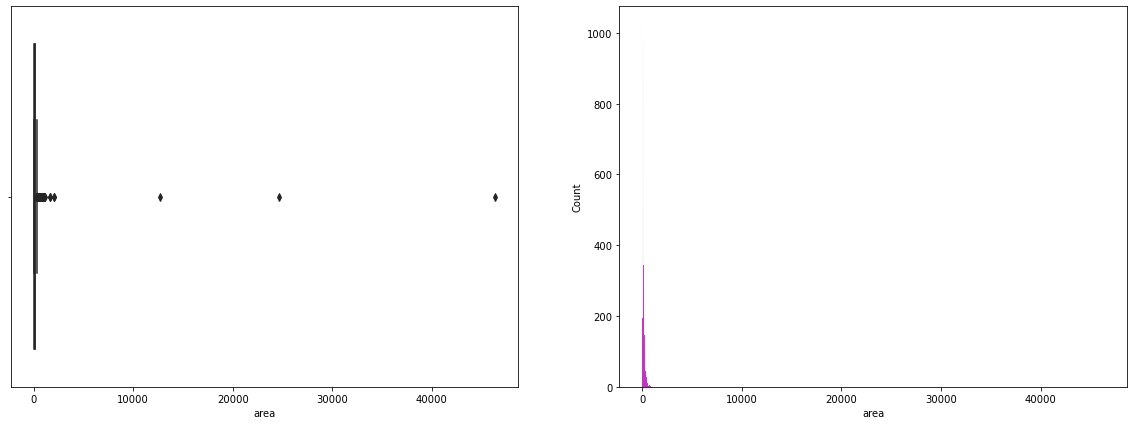

In [101]:

fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = df1["area"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = df1["area"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

### many outliers 



## outlier treatment

In [102]:
df1.describe()

,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10691.000000,10691.000000,10691.000000,10691.000000,10691.000000,1.069100e+04,10691.000000,10691.000000,10691.000000,1.069100e+04
mean,149.224394,2.506033,2.236835,1.609110,5.040314,1.174061e+03,3896.368441,366.723319,53.302591,5.490669e+03
std,537.041642,1.171311,1.407262,1.589591,5.351985,1.559303e+04,3408.681883,3107.977061,47.769937,1.648549e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061500e+03
50%,90.000000,2.000000,2.000000,1.000000,3.000000,5.600000e+02,2662.000000,125.000000,36.000000,3.582000e+03
75%,182.000000,3.000000,3.000000,2.000000,8.000000,1.238000e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,51.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


In [103]:
a=df1.describe()['area']
a

count    10691.000000
mean       149.224394
std        537.041642
min         11.000000
25%         56.000000
50%         90.000000
75%        182.000000
max      46335.000000
Name: area, dtype: float64

In [104]:
iqr=(a.loc['75%']-a.loc['25%'])
iqr

126.0

In [105]:
upper=182+1.5*iqr
upper

371.0

In [106]:
lower=56-1.5*iqr
lower

-133.0

In [109]:
b=df1.copy()
b

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


## filter data with area between 11 and 371 

In [110]:
c=b[b['area'].between(11,371)]
c

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


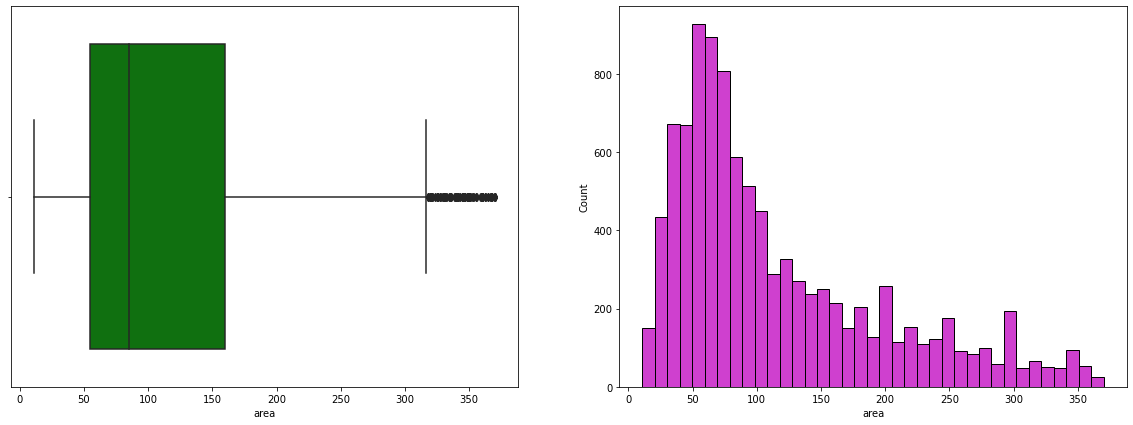

In [111]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = c["area"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = c["area"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

## hoa (R$)

In [112]:
info_of_numerical('hoa (R$)')

The mean of the hoa (R$) is 1174.0613600224488
The median of the hoa (R$) is 560.0
The mode of the hoa (R$) is 0
The standard deviation of the hoa (R$) is 15593.033985967735
Number of missing values in the hoa (R$) is 0


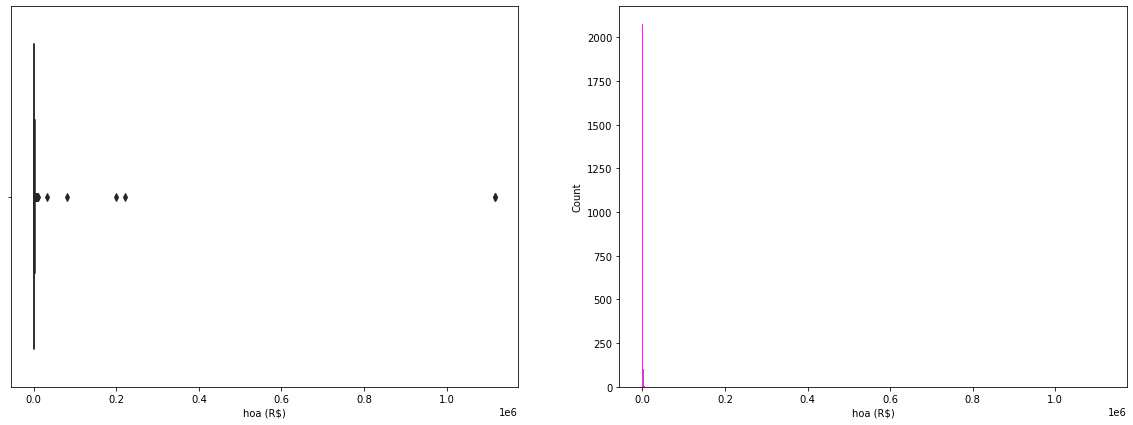

In [113]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = c["hoa (R$)"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = c["hoa (R$)"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

In [114]:
## many 0 values as many woulh have no hoa fee

## rent amount (R$)

In [115]:
info_of_numerical('rent amount (R$)')

The mean of the rent amount (R$) is 3896.3684407445517
The median of the rent amount (R$) is 2662.0
The mode of the rent amount (R$) is 2500
The standard deviation of the rent amount (R$) is 3408.68188282076
Number of missing values in the rent amount (R$) is 0


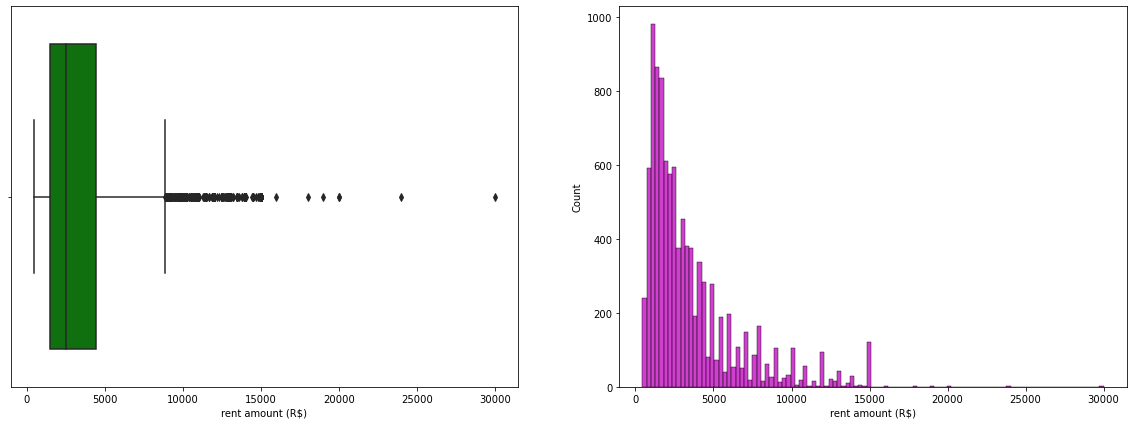

In [116]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = c["rent amount (R$)"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = c["rent amount (R$)"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

## property tax (R$)

In [117]:
info_of_numerical('property tax (R$)')

The mean of the property tax (R$) is 366.72331867926295
The median of the property tax (R$) is 125.0
The mode of the property tax (R$) is 0
The standard deviation of the property tax (R$) is 3107.9770610072187
Number of missing values in the property tax (R$) is 0


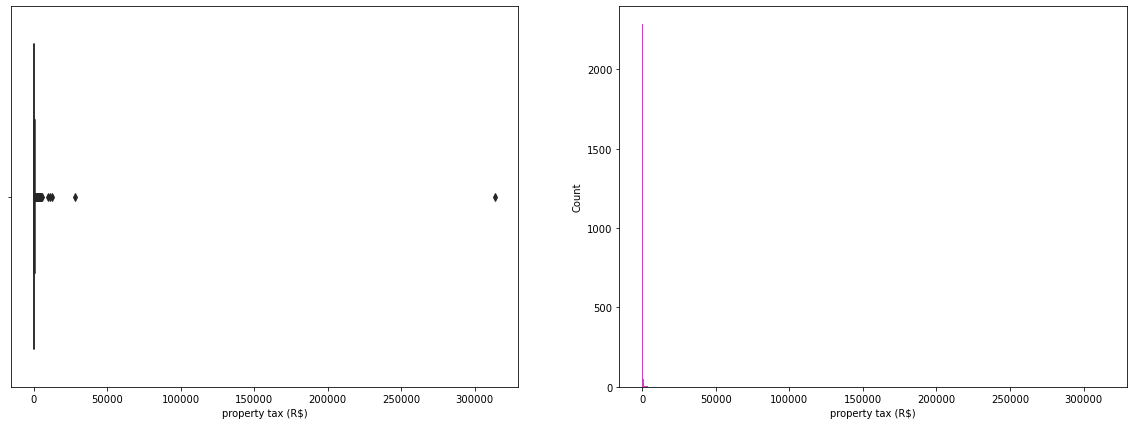

In [118]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = c["property tax (R$)"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = c["property tax (R$)"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

## fire insurance (R$)

In [119]:
info_of_numerical('fire insurance (R$)')

The mean of the fire insurance (R$) is 53.30259096436255
The median of the fire insurance (R$) is 36.0
The mode of the fire insurance (R$) is 16
The standard deviation of the fire insurance (R$) is 47.76993715715784
Number of missing values in the fire insurance (R$) is 0


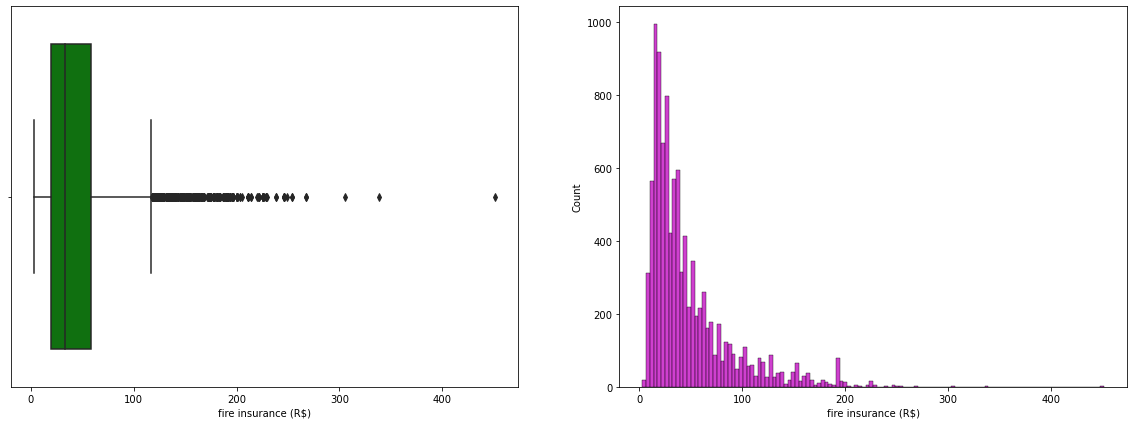

In [120]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = c["fire insurance (R$)"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = c["fire insurance (R$)"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

## total (R$)

In [121]:
info_of_numerical('total (R$)')

The mean of the total (R$) is 5490.668599756805
The median of the total (R$) is 3582.0
The mode of the total (R$) is 2555
The standard deviation of the total (R$) is 16485.486233734882
Number of missing values in the total (R$) is 0


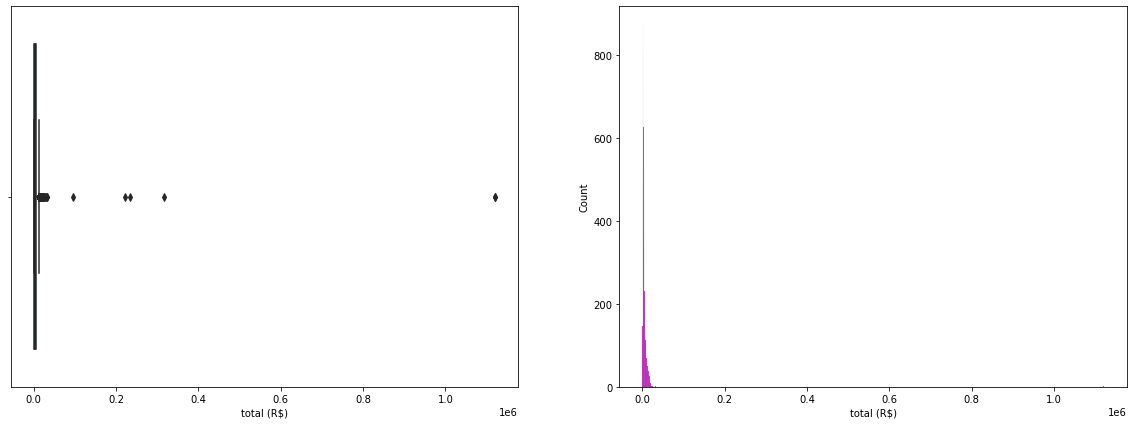

In [122]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = c["total (R$)"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = c["total (R$)"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

In [163]:
c.describe()

,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10019.000000,10019.000000,10019.000000,10019.000000,10019.000000,1.001900e+04,10019.000000,10019.000000,10019.000000,1.001900e+04
mean,116.068370,2.387464,2.064577,1.430083,5.190837,1.150813e+03,3514.481186,299.511927,47.454536,5.012467e+03
std,82.897586,1.073272,1.223123,1.378389,5.322661,1.609520e+04,2988.819555,3175.514246,40.533865,1.685736e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,55.000000,2.000000,1.000000,0.000000,1.000000,2.300000e+02,1500.000000,34.000000,20.000000,1.997000e+03
50%,85.000000,2.000000,2.000000,1.000000,4.000000,5.710000e+02,2500.000000,112.000000,33.000000,3.348000e+03
75%,160.000000,3.000000,3.000000,2.000000,8.000000,1.200000e+03,4447.500000,317.000000,59.000000,6.017500e+03
max,370.000000,10.000000,9.000000,10.000000,51.000000,1.117000e+06,30000.000000,313700.000000,451.000000,1.120000e+06


In [164]:
d=c.describe()['total (R$)']
d

count    1.001900e+04
mean     5.012467e+03
std      1.685736e+04
min      4.990000e+02
25%      1.997000e+03
50%      3.348000e+03
75%      6.017500e+03
max      1.120000e+06
Name: total (R$), dtype: float64

In [165]:
iqr1=(d.loc['75%']-d.loc['25%'])
iqr1

4020.5

In [167]:
upper=d.loc['75%']+iqr1*1.5
upper

12048.25

In [168]:
lower=d.loc['25%']-iqr1*1.5
lower

-4033.75

In [178]:
fg=c[c['total (R$)'].between(lower,12048)]
fg

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,Rio de Janeiro,98,2,1,0,1,acept,not furnished,560,3900,184,51,4695
10685,São Paulo,83,3,2,2,11,acept,not furnished,888,7521,221,96,8726
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390


## level 2 analysis

In [123]:
from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "Continuous": continuous}, headers = ["categorical", "continuous"]))

categorical     continuous
--------------  -------------------
city            area
rooms           hoa (R$)
bathroom        rent amount (R$)
parking spaces  property tax (R$)
floor           fire insurance (R$)
animal          total (R$)
furniture


## CAT-CAT ANALYSIS  (relationship between categorical data)

1. impact of city on parking spaces
2. impact of city on floor
3. impact of city on rooms
4. impact of city 

## 1. impact of city on parking spaces

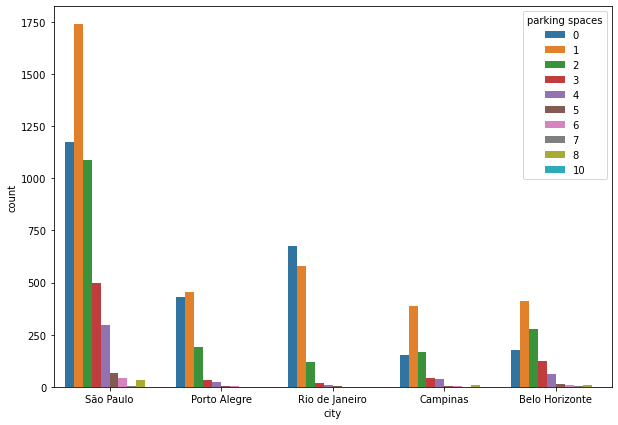

In [203]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "city", hue = "parking spaces", data = fg)
plt.show()

## most of the city has max 0 and 1 parking spaces and porto would be the best apart from sao paulo and rio 

## impact of city on floor

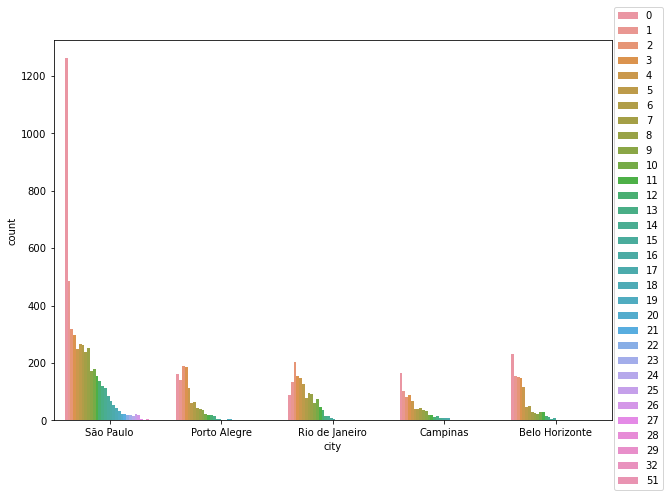

In [180]:

fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "city", hue = "floor", data = fg)
plt.legend(bbox_to_anchor=(1.1,1.1))
plt.show()


In [ ]:
# who want to live in high rise shoul go to belo horizonte

## impact of city on rooms

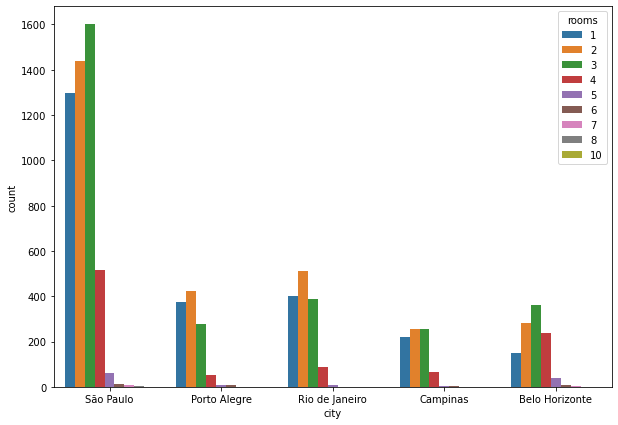

In [181]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "city", hue = "rooms", data = fg)

plt.show()

In [ ]:
# who want to  no of rooms greater than 3 can go to belo horizonte 

D:\anacon\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


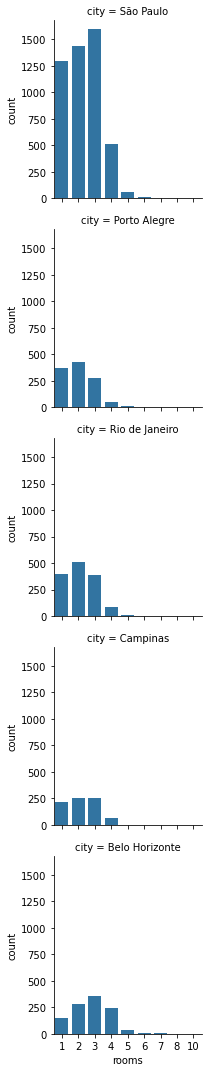

In [182]:

g = sns.FacetGrid(fg, row = "city")
g.map(sns.countplot, "rooms")
plt.show()

# cat to numerical analysis

In [140]:
from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "Continuous": continuous}, headers = ["categorical", "continuous"]))

categorical     continuous
--------------  -------------------
city            area
rooms           hoa (R$)
bathroom        rent amount (R$)
parking spaces  property tax (R$)
floor           fire insurance (R$)
animal          total (R$)
furniture


## impact of city on area

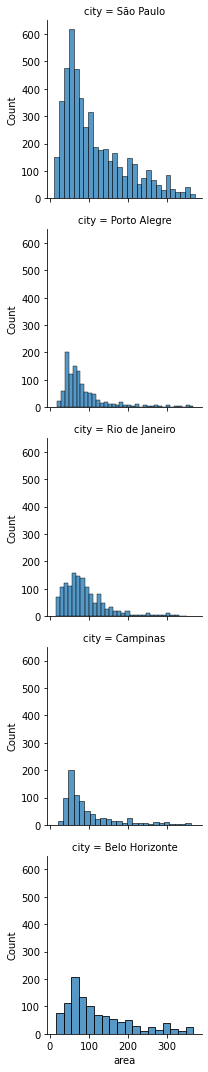

In [183]:
g = sns.FacetGrid(fg, row = "city")
g.map(sns.histplot, "area")
plt.show()

In [ ]:
# who want large space can go to campinas

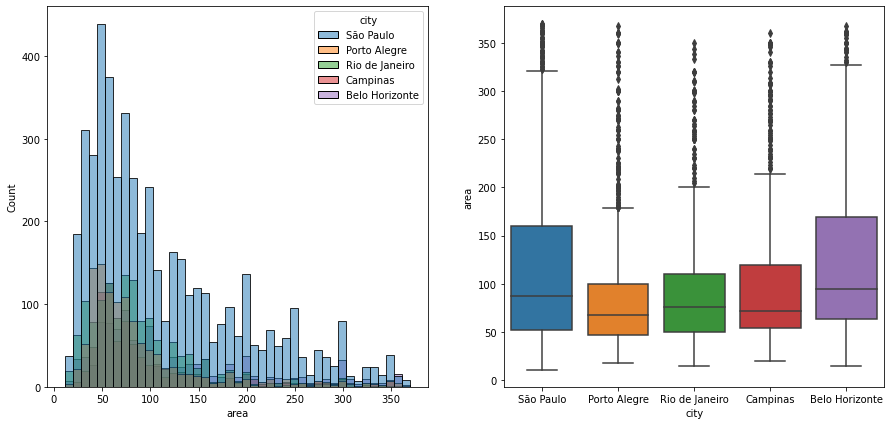

In [184]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = fg["area"], hue = fg["city"], ax = ax[0])
sns.boxplot(y = fg["area"], x = fg["city"], ax = ax[1])
plt.show()


## impact of city on property tax

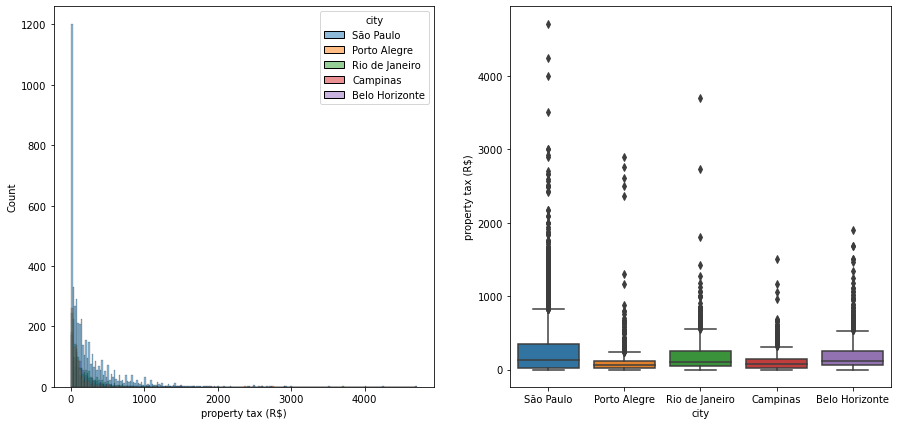

In [185]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = fg["property tax (R$)"], hue = fg["city"], ax = ax[0])
sns.boxplot(y = fg["property tax (R$)"], x = fg["city"], ax = ax[1])
plt.show()

In [ ]:
# porto has min property tax apart from rio and sao paulo

## impact of city on rent amount

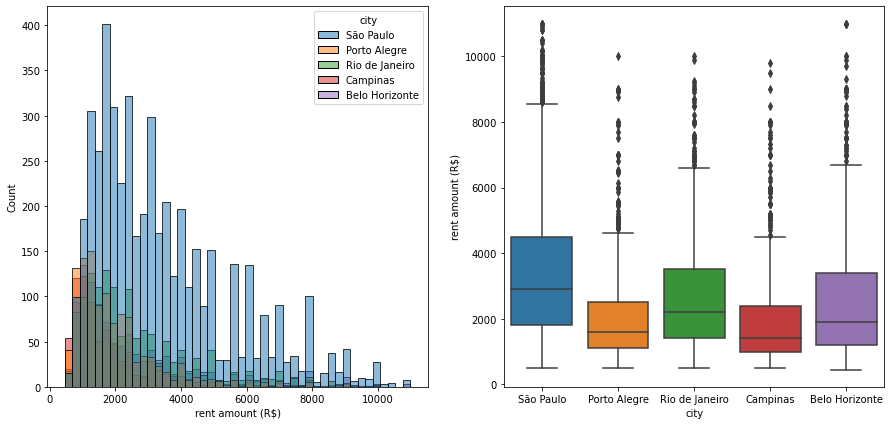

In [186]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = fg["rent amount (R$)"], hue = fg["city"], ax = ax[0])
sns.boxplot(y = fg["rent amount (R$)"], x = fg["city"], ax = ax[1])
plt.show()

In [ ]:
# campinas has minimum rent

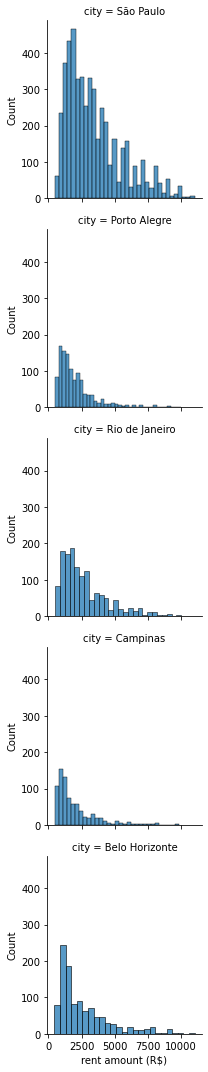

In [187]:
g = sns.FacetGrid(fg, row = "city")
g.map(sns.histplot, "rent amount (R$)")
plt.show()

## impact on city on total

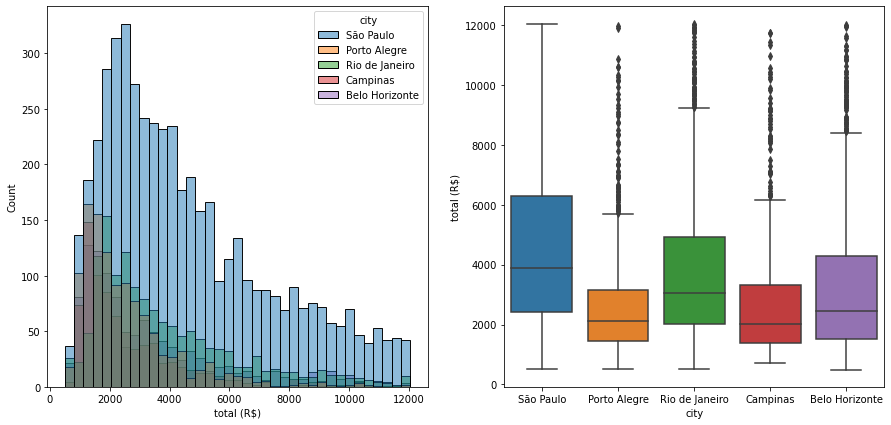

In [204]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = fg["total (R$)"], hue = fg["city"], ax = ax[0])
sns.boxplot(y = fg["total (R$)"], x = fg["city"], ax = ax[1])
plt.show()

In [ ]:
# porto alegre has min total cost

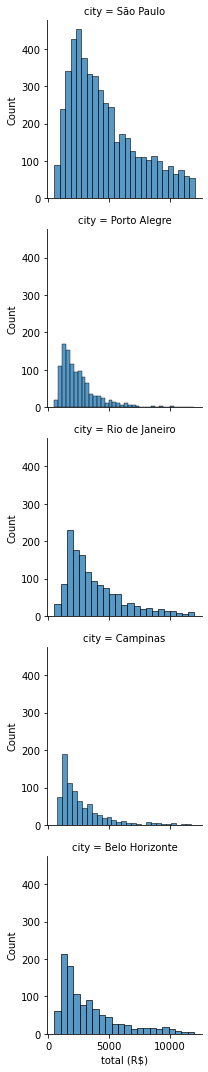

In [188]:
g = sns.FacetGrid(fg, row = "city")
g.map(sns.histplot, "total (R$)")
plt.show()

## impact of rooms on rent

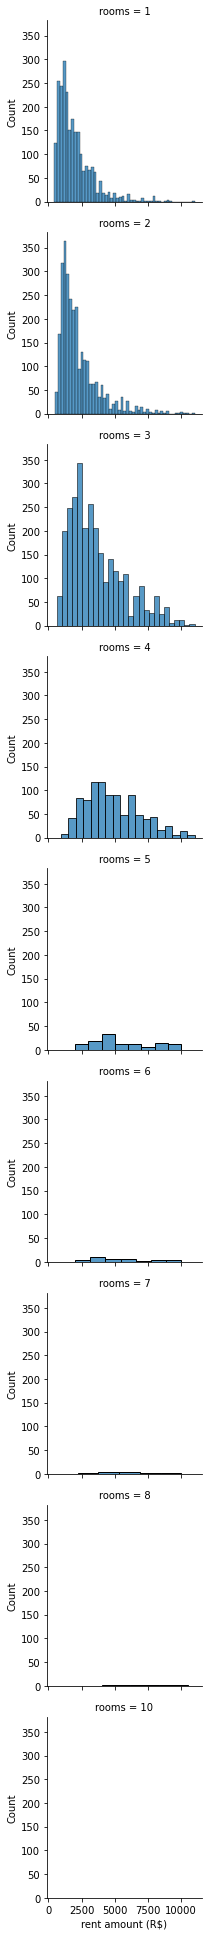

In [189]:
g = sns.FacetGrid(fg, row = "rooms")
g.map(sns.histplot, "rent amount (R$)")
plt.show()

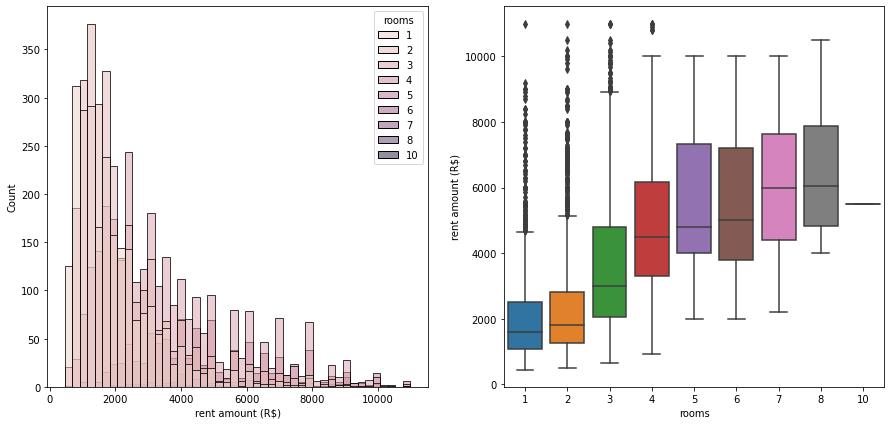

In [190]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = fg["rent amount (R$)"], hue = fg["rooms"], ax = ax[0])
sns.boxplot(y = fg["rent amount (R$)"], x = fg["rooms"], ax = ax[1])
plt.show()

In [ ]:
# after 4 rooms rent dont increase much

# num to num analysis

## impact of area on total 

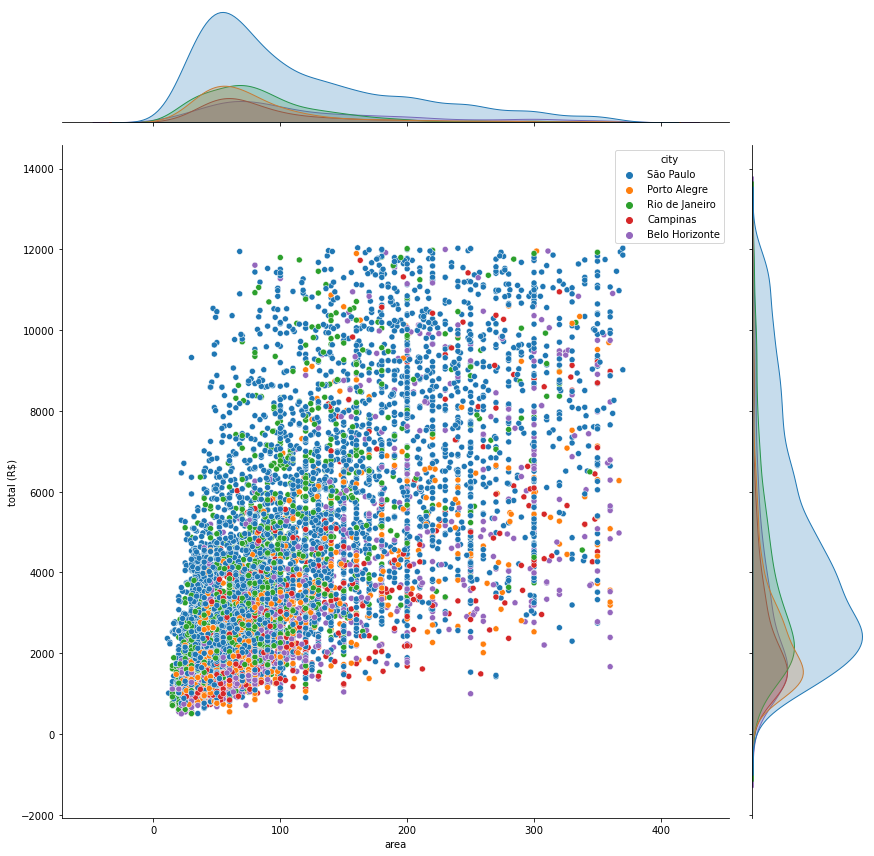

In [216]:
sns.jointplot(x = "area", y = "total (R$)", hue='city',data = fg,height=12);

In [ ]:
# porto alegro and belo have less total for greater area

## impact of area on rent

<Figure size 1152x648 with 0 Axes>

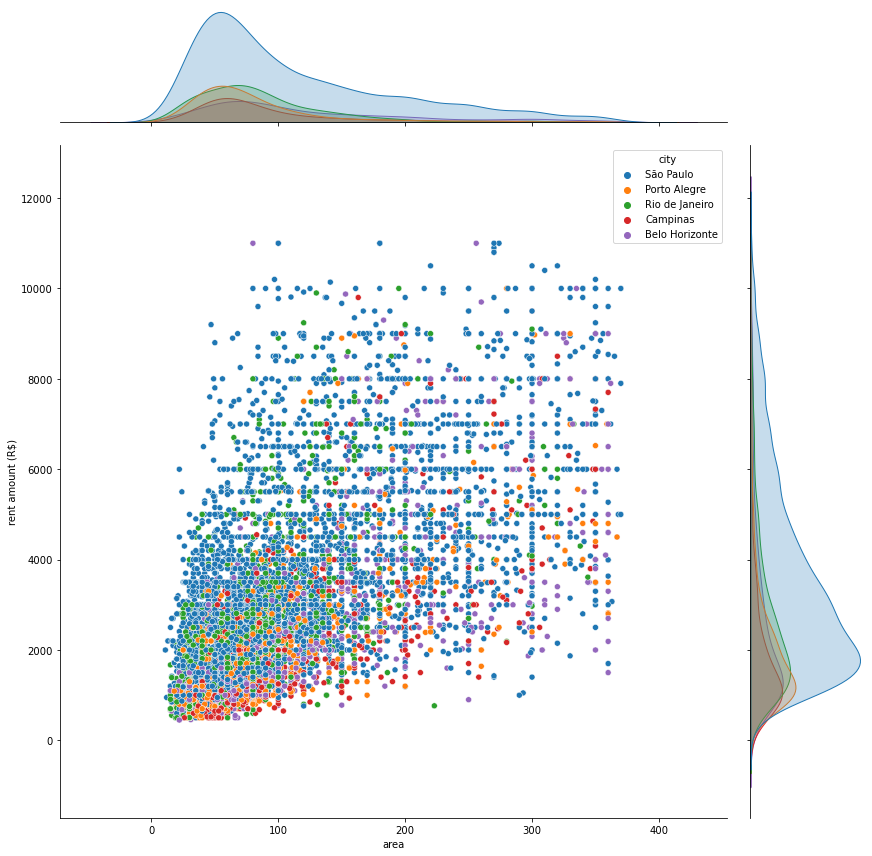

In [214]:

sns.jointplot(x = "area", y = "rent amount (R$)", hue='city',data = fg,height=12);

In [ ]:
# belo horizonte has min rent for max area of space

# people want min rent having animals

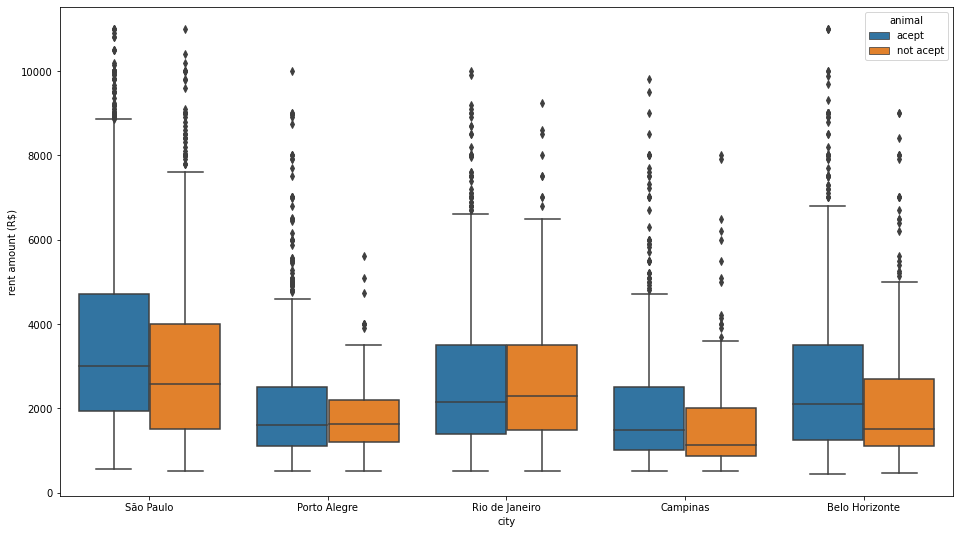

In [223]:
plt.figure(figsize=(16,9))
sns.boxplot(x = "city", y = "rent amount (R$)", hue='animal',data = fg);

In [ ]:
# campinas has lower rent for house accepting animals

## impact of furnished house on rent in cities

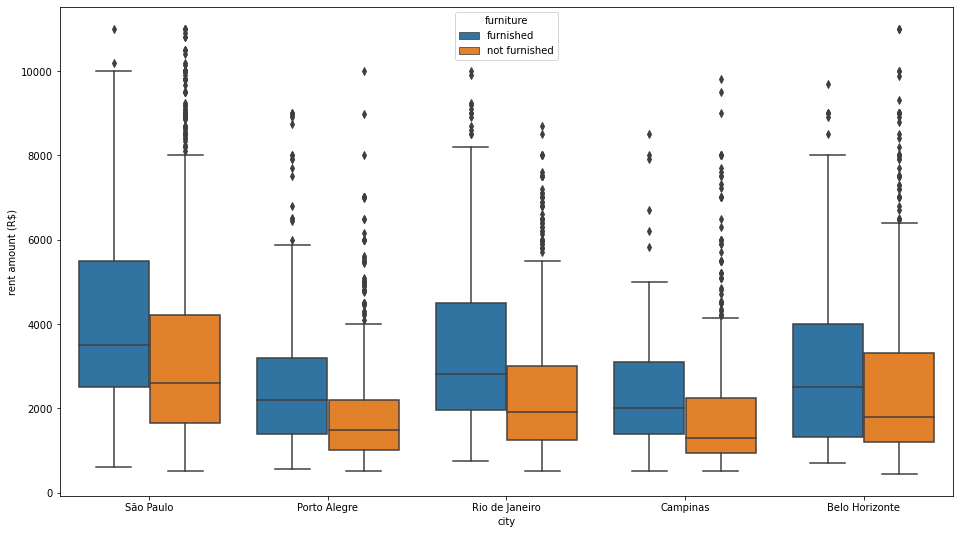

In [224]:
plt.figure(figsize=(16,9))
sns.boxplot(x = "city", y = "rent amount (R$)", hue='furniture',data = fg);

In [ ]:
# porto alegre has lowest rent having furnished house